In [27]:
!pip install scipy
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 0.8/44.5 MB 4.8 MB/s eta 0:00:10
   ---- ----------------------------------- 5.0/44.5 MB 15.1 MB/s eta 0:00:03
   -------- ------------------------------- 9.2/44.5 MB 17.8 MB/s eta 0:00:02
   ------------ --------------------------- 14.4/44.5 MB 19.3 MB/s eta 0:00:02
   ----------------- ---------------------- 19.9/44.5 MB 20.3 MB/s eta 0:00:02
   ---------------------- ----------------- 25.2/44.5 MB 21.0 MB/s eta 0:00:01
   --------------------------- ------------ 30.4/44.5 MB 21.4 MB/s eta 0:00:01
   ------------------------------- -------- 35.1/44.5 MB 21.9 MB/s eta 0:00:01
   ------------------------------------ --- 40.1/44.5 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 21.1 MB/s

In [1]:
# loading dataset
import pandas as pd

ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
# checking null values
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
ev_data = ev_data.dropna()

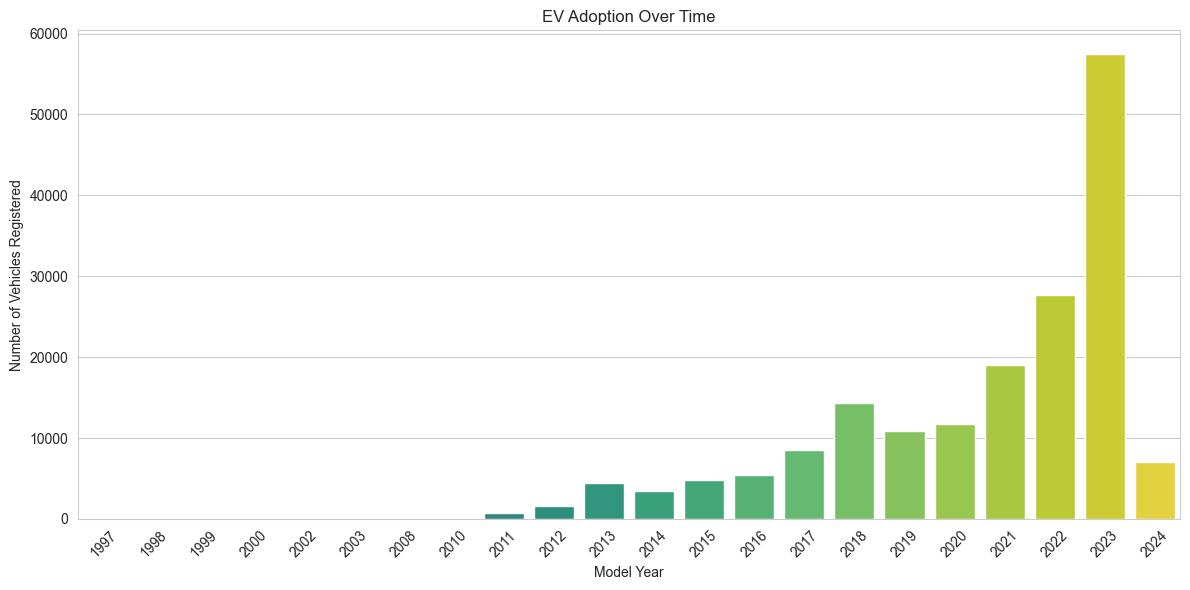

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = 'viridis', legend=False, hue = ev_adoption_by_year.index)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

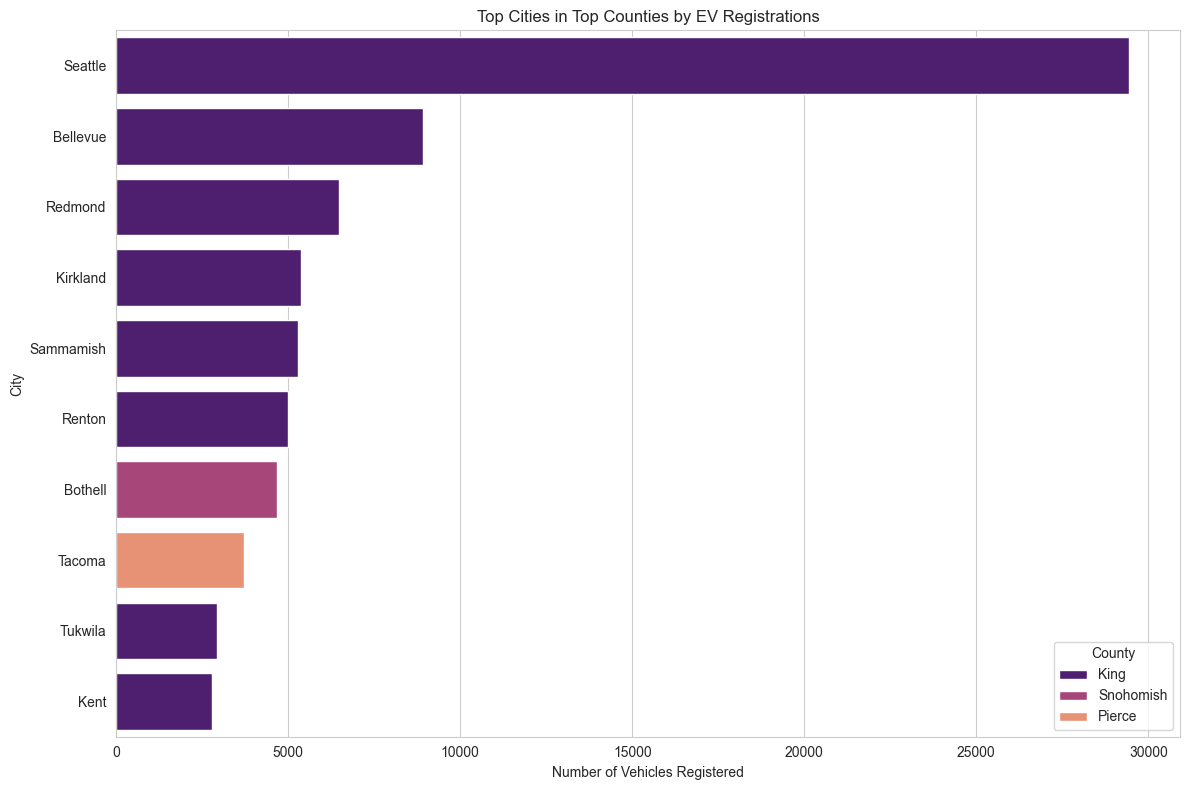

In [14]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

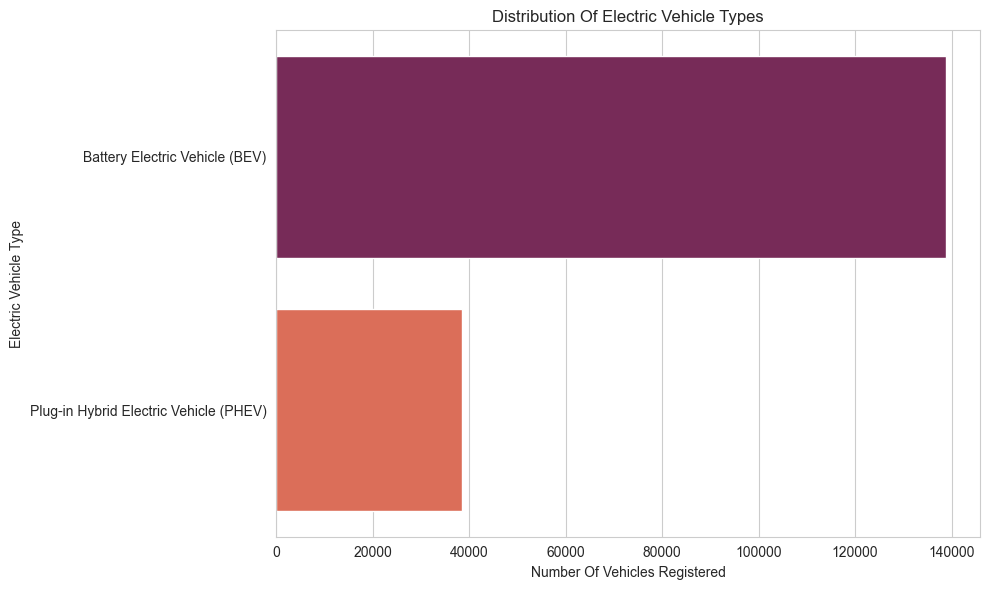

In [15]:
# analyzing the distribution of electric vehicle types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize = (10, 6))
sns.barplot(x = ev_type_distribution.values, y = ev_type_distribution.index, palette = 'rocket', legend = False, hue = ev_type_distribution.index)
plt.title('Distribution Of Electric Vehicle Types')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

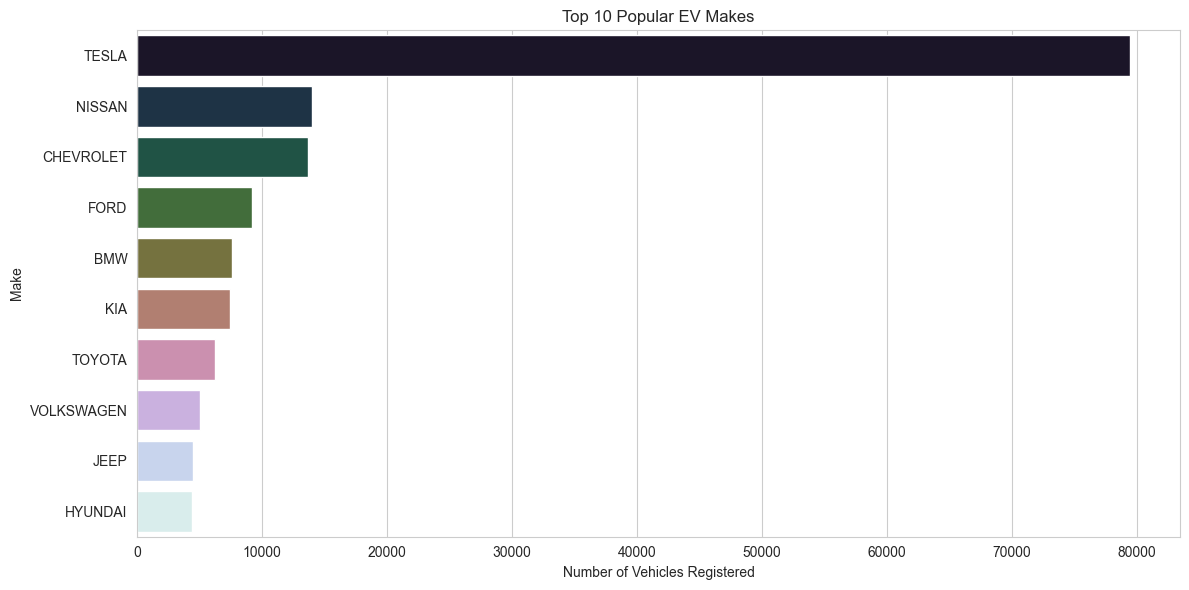

In [16]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10) # limiting

plt.figure(figsize=(12,6))
sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index, palette = 'cubehelix', hue = ev_make_distribution.index, legend = False)
plt.title("Top 10 Popular EV Makes")
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

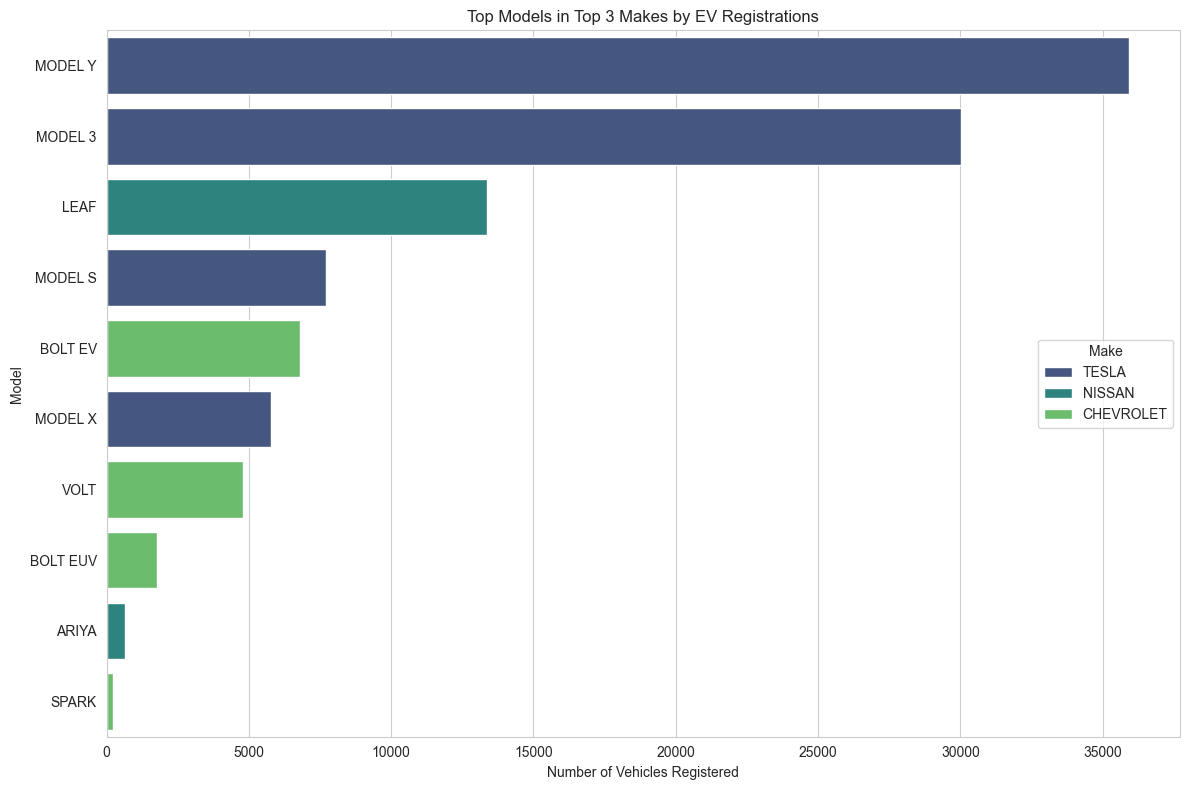

In [17]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

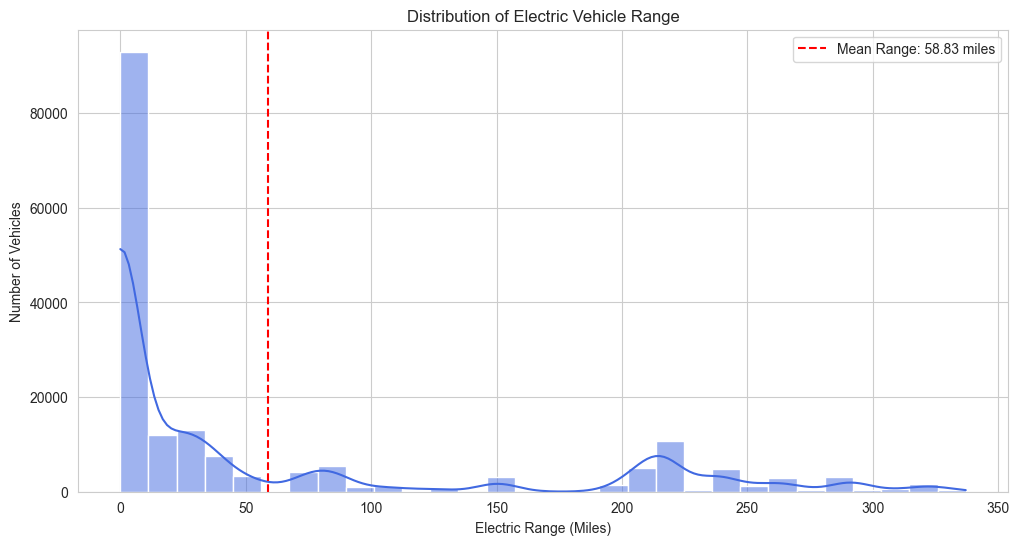

In [18]:
# analyzing the distribution of electric range
plt.figure(figsize = (12, 6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde = True, color = 'royalblue')
plt.title('Distribution of Electric Vehicle Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

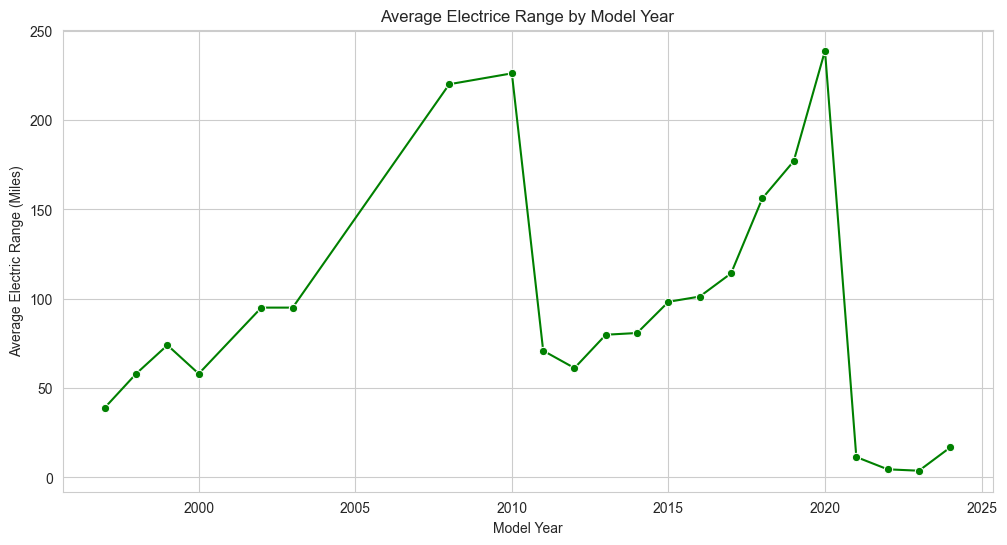

In [19]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = average_range_by_year, marker = 'o', color = 'green')
plt.title('Average Electrice Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

- There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- There is a noticeable peak around the year 2020 when the average range reaches its highest point.
- Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
- After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

Let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

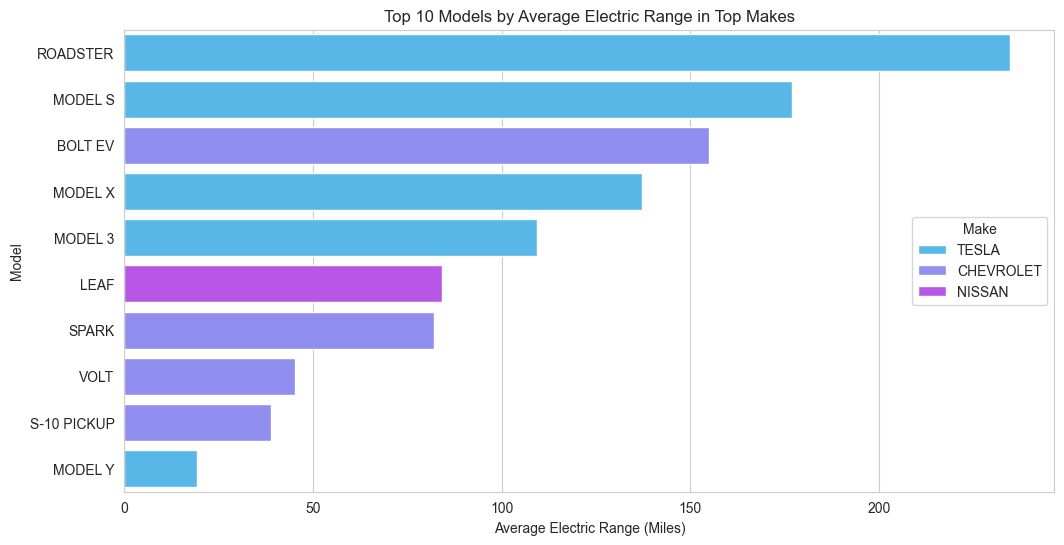

In [21]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index()

# the top 10 models with the higest average electric range
top_range_models = average_range_by_model.head(10)
plt.figure(figsize = (12, 6))
barplot = sns.barplot(x = 'Electric Range', y = 'Model', hue = 'Make', data = top_range_models, palette = 'cool')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (Miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

## Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [23]:
# Calculate the numbers of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

- In 2021, there were 19,063 EVs registered.
- In 2022, the number increased to 27708 EVs.
- In 2023, a significant jump to 57,519 EVs was observed.
- For 2024, currently, 7,072 EVs are registered, which suggests partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [24]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include the years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a funtction for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forcast the number of EVs for 2024 and for next five years
forcast_years = np.range(2024, 2024 + 6) - filtered_years.index.min()
forcasted_values = exp_growth(forcast_years, *params)

# create a dictionary to display the forcasted values for easier interpretation
forcasted_evs = dict(zip(forcast_years + filtered_years.index.min(), forcated_values))

print(forcasted_evs)

ModuleNotFoundError: No module named 'scipy'